<img src="./logo_UNSAM.jpg" align="right" width="250" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº7
#### Nicolás Sewrjugin y Sofía Gervasi


# Introducción

En el procesamiento digital de señales, los filtros lineales invariantes en el tiempo (*LTI*) constituyen una herramienta esencial para modificar o analizar el contenido espectral de una señal discreta. Estos filtros se describen comúnmente mediante ecuaciones en diferencias, que relacionan la salida $y[n]$ con las muestras actuales y pasadas de la entrada $x[n]$. En el caso de los filtros **FIR (*Finite Impulse Response*)**, la salida depende únicamente de valores presentes y pasados de la entrada, sin recurrencia sobre las salidas anteriores, lo cual garantiza su estabilidad y una fase lineal en muchos casos.

La ecuación general de un filtro FIR de orden $N$ puede expresarse como:

\begin{equation}
y(n) = \sum_{k=0}^{N} b_k \, x(n - k)
\end{equation}

donde los coeficientes $b_k$ determinan la forma de la respuesta impulsiva del sistema y, por tanto, su respuesta en frecuencia.

Para el análisis de estos sistemas, se utiliza la **transformada Z**, que permite describir la relación entre la entrada y la salida en el dominio complejo:

\begin{equation}
T(z) = \frac{Y(z)}{X(z)} = \sum_{k=0}^{N} b_k \, z^{-k}
\end{equation}

La **respuesta en frecuencia** del sistema se obtiene evaluando la función de transferencia sobre el círculo unitario ($z = e^{j\omega}$):

\begin{equation}
H(e^{j\omega}) = T(z)\big|_{z = e^{j\omega}} = \sum_{k=0}^{N} b_k \, e^{-j\omega k}
\end{equation}

A partir de esta expresión, pueden calcularse el **módulo** y la **fase** de la respuesta:

\begin{equation}
|H(e^{j\omega})| = \sqrt{ \text{Re}\{H(e^{j\omega})\}^2 + \text{Im}\{H(e^{j\omega})\}^2 }
\end{equation}

\begin{equation}
\angle H(e^{j\omega}) = \tan^{-1}\left( \frac{\text{Im}\{H(e^{j\omega})\}}{\text{Re}\{H(e^{j\omega})\}} \right)
\end{equation}

En general, se utiliza el hecho de extraer factor común el punto medio de $H(e^{j\omega})$, brindando fácilmente el producto de un término que contiene a la fase y de otro que representa al módulo.

\begin{equation}
H(e^{j\omega}) = e^{-j\omega \frac{N}{2}} \cdot A(\omega)
\end{equation}

El análisis de la respuesta en frecuencia, tanto en módulo como en fase, permite caracterizar de forma completa el comportamiento espectral del sistema. El módulo $|H(e^{j\omega})|$ indica en qué medida el filtro amplifica o atenúa las distintas componentes de frecuencia de la señal de entrada, revelando así si el sistema actúa como un filtro pasa bajos, pasa altos, elimina banda o pasabanda. Por su parte, la fase $\angle H(e^{j\omega})$ describe los desplazamientos temporales que cada componente sufre al atravesar el sistema, lo cual resulta esencial para evaluar la distorsión de fase y el retardo introducido. En particular, los filtros FIR con coeficientes simétricos presentan una fase lineal, lo que implica un retardo constante y, por ende, ausencia de distorsión temporal en la señal filtrada.

En esta práctica se analizan cuatro sistemas discretos definidos por ecuaciones en diferencias que representan distintos tipos de filtros FIR: filtros de **media móvil** de diferentes longitudes y filtros de **diferenciación discreta**. Para cada uno se calculará su función de transferencia $T(z)$, su respuesta en frecuencia (módulo y fase), y se realizará una simulación numérica utilizando *Numpy* para validar los resultados teóricos:

\begin{equation}
 a) y(n) = x(n−3)+x(n−2)+x(n−1)+x(n)
\end{equation}
\begin{equation}
 b) y(n)=x(n−4)+x(n−3)+x(n−2)+x(n−1)+x(n)
\end{equation}
\begin{equation}
 c) y(n)=x(n)−x(n−1)
\end{equation}
\begin{equation}
 d) y(n)=x(n)−x(n−2)
\end{equation}


El estudio de estos sistemas permite observar cómo los filtros de media móvil actúan como **promediadores y atenuadores de altas frecuencias**, mientras que los filtros de diferencia generan **efectos de realce o cancelación** de componentes de baja frecuencia. 


# Análisis y desarrollo


### Cálculo de $T(Z) = \frac{Y(Z)}{X(Z)}$ para las ecuaciones en diferencias

In [3]:
from IPython.display import IFrame
IFrame("./TS7_EJ1.pdf", width=800, height=600)

### Cálculo de la respuesta en frecuencia de módulo y fase

### Simulación y validación de la respuesta en frecuencia con Numpy

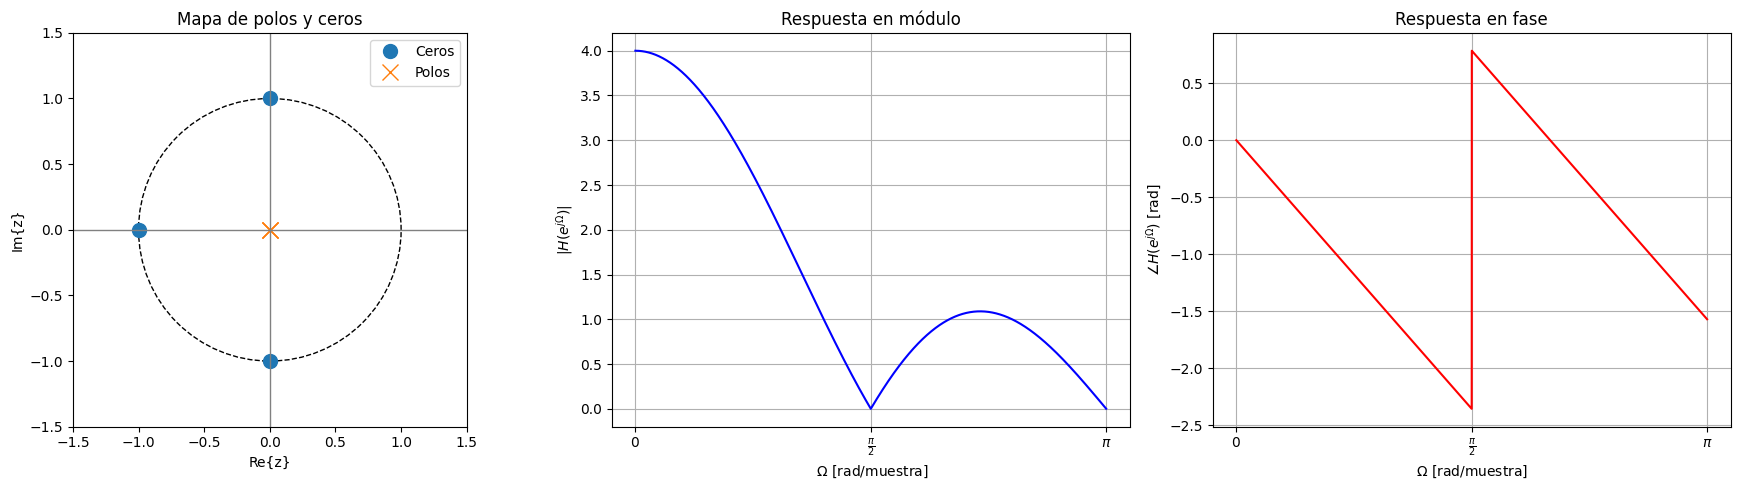

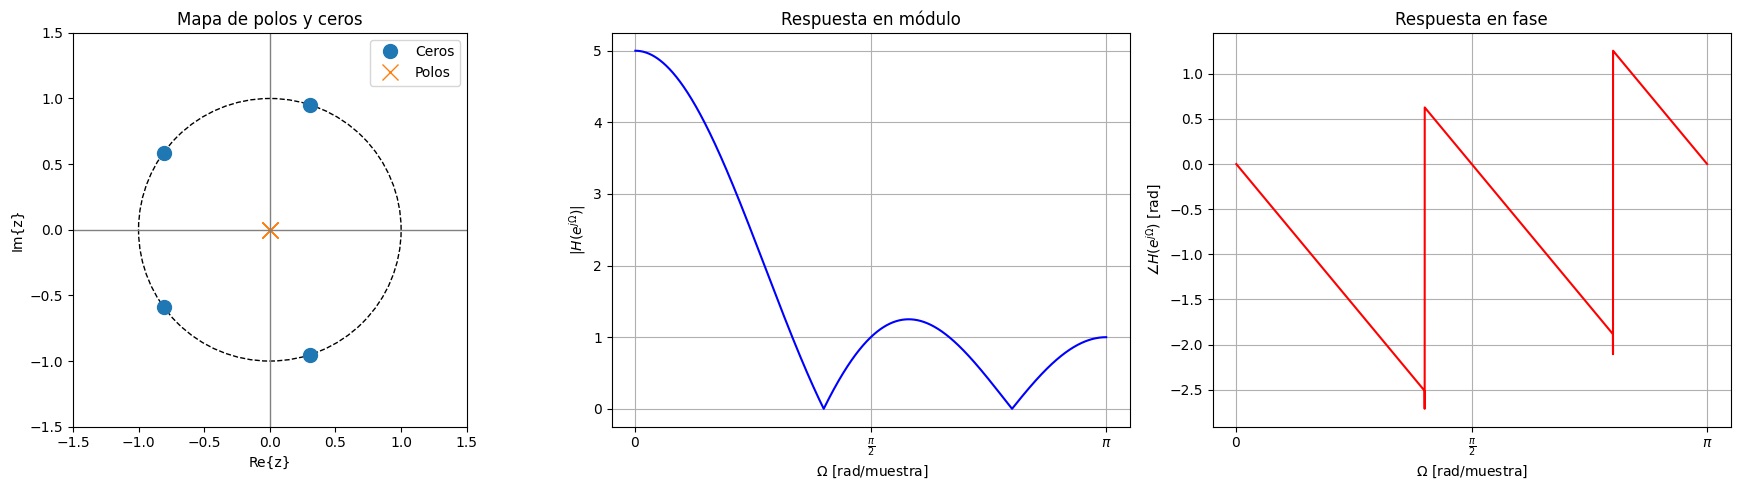

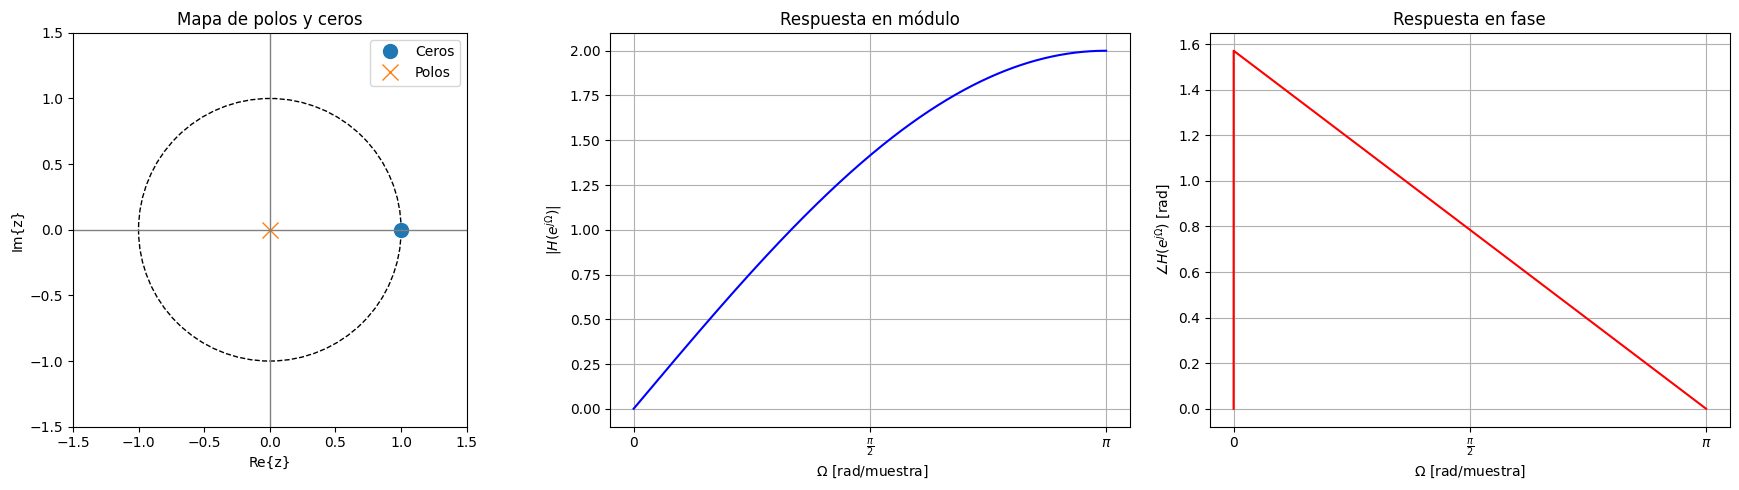

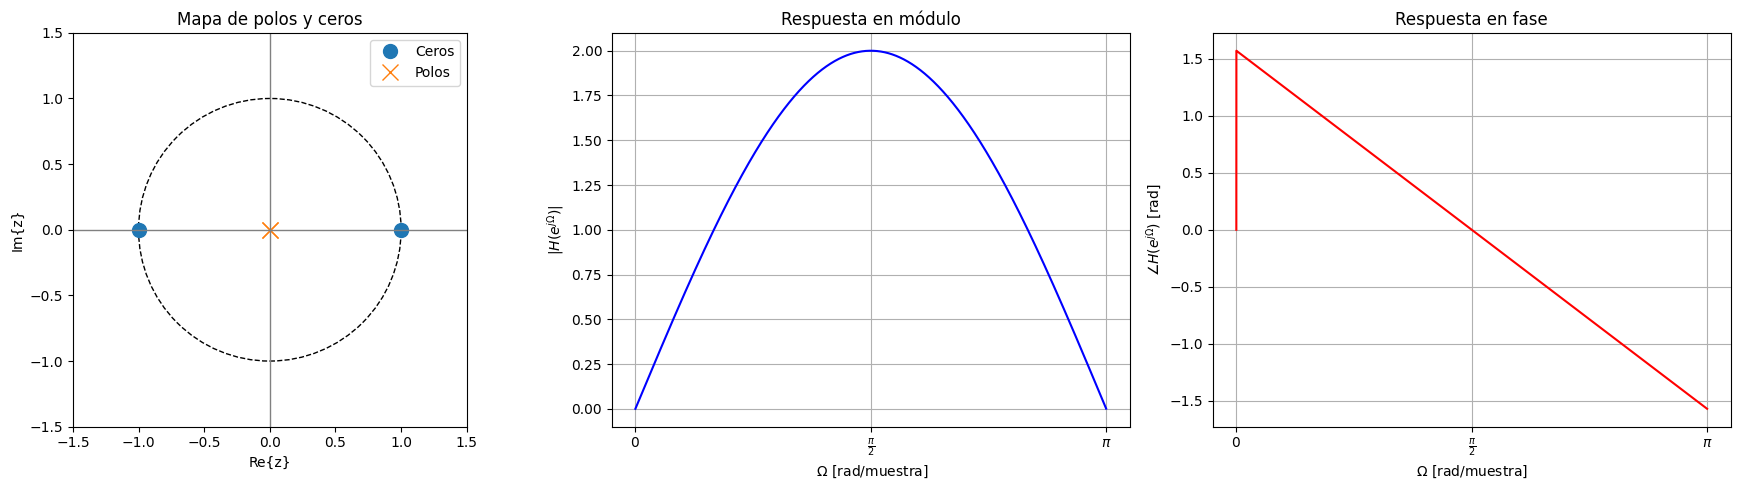

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def plot_freq_response(num, den):
    zeros, poles, _ = signal.tf2zpk(num, den)
    w, h = signal.freqz(num, den, worN=8000)

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # Mapa de polos y ceros
    axs[0].plot(np.real(zeros), np.imag(zeros), 'o', label='Ceros', markersize=10)
    axs[0].plot(np.real(poles), np.imag(poles), 'x', label='Polos', markersize=12)
    axs[0].axhline(0, color='gray', lw=1)
    axs[0].axvline(0, color='gray', lw=1)
    axs[0].set_title("Mapa de polos y ceros")
    axs[0].set_xlabel(r'Re{z}')
    axs[0].set_ylabel(r'Im{z}')
    axs[0].legend()

    # Dibujar círculo unidad
    circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='dashed')
    axs[0].add_artist(circle)
    axs[0].set_xlim(-1.5, 1.5)
    axs[0].set_ylim(-1.5, 1.5)
    axs[0].set_aspect('equal', adjustable='box')

    # Respuesta en módulo
    axs[1].plot(w, np.abs(h), 'b')
    axs[1].set_title("Respuesta en módulo")
    axs[1].set_xlabel(r' $\Omega$ [rad/muestra]')
    axs[1].set_ylabel(r'$|H(e^{j\Omega})|$')
    axs[1].grid(True)
    axs[1].set_xticks([0, np.pi/2, np.pi])
    axs[1].set_xticklabels([r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])

    # Respuesta en fase
    axs[2].plot(w, np.angle(h), 'r')
    axs[2].set_title("Respuesta en fase")
    axs[2].set_xlabel(r'$\Omega$ [rad/muestra]')
    axs[2].set_ylabel(r'$\angle H(e^{j\Omega})$ [rad]')
    axs[2].grid(True)
    axs[2].set_xticks([0, np.pi/2, np.pi])
    axs[2].set_xticklabels([r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])


    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

#%% Sistema A
num = [1, 1, 1, 1]  # 1 + z + z^2 + z^3 
den = [1, 0, 0, 0]  # z^3 

plot_freq_response(num, den)

#%% Sistema B

num_b = [1, 1, 1, 1, 1]  # 1 + z + z^2 + z^3 + z^4
den_b = [1, 0, 0, 0, 0]  # z^4

plot_freq_response(num_b, den_b)

#%% Sistema C

num_c = [1, -1]  # -1 + z
den_c = [1, 0]      # z

plot_freq_response(num_c, den_c)

#%% Sistema D

num_d = [1, 0, -1]  # -1 + z^2
den_d = [1, 0, 0]         

plot_freq_response(num_d, den_d)

Todos los sistemas presentados son filtros FIR (Finite Impulse Response),ya que ninguno tiene realimentación de la salida y(n) y solo dependen de valores presentes y pasados de la entrada x(n). 

- El sistema A constituye un filtro FIR de orden 3, donde la salida en cualquier instante depende exclusivamente de la entrada actual y tres muestras previas de la entrada, sin ninguna dependencia de valores pasados de la salida. Al analizar el mapa de polos y ceros, identificamos tres ceros distribuidos uniformemente sobre el círculo unitario, ubicados en $ \frac{\pi}{2}$, $\pi$ y $ \frac{3\pi}{2} $. Analiticamente se puede notar que los polos del sistema se ubican como un triple polo en z=0. Esta configuración es característica de los filtros FIR, ya que garantiza que el sistema sea estable, porque todos los polos están dentro del círculo unitario. La ubicacion de los ceros sobre el círculo unitario se refleja directamente en la respuesta en frecuencia, ya que cada cero anula específicamente una componente frecuencial, en este caso $\frac{\pi}{2}$, $\pi$. La respuesta en módulo revela un comportamiento paso-bajo, donde el filtro alcanza su valor máximo en DC. A medida que la frecuencia aumenta, el módulo cae rápidamente hasta llegar a cero en $ \frac{\pi}{2}$. Posteriormente, la respuesta muestra una recuperación parcial en frecuencias intermedias antes de atenuarse nuevamente hacia la frecuencia de Nyquist. 
La respuesta en fase del sistema es lineal decreciente, va desde cero hasta aproximadamente $ -\pi$. Esta linealidad en la fase implica un retardo de grupo constante. 
  
- El sistema B es similar al A, pero de orden 4. El análisis del mapa de polos y ceros revela cuatro ceros uniformemente distribuidos sobre el círculo unitario en ángulos de $\frac{2\pi}{5}$,  $\frac{4\pi}{5}$,  $\frac{6\pi}{5}$y  $\frac{8\pi}{5}$. El sistema presenta un cuádruple polo en el origen que crean cuatro frecuencias específicas donde la respuesta del filtro se anula completamente.

- El sistema C representa un filtro FIR de orden 1, que calcula la diferencia entre muestras consecutivas. El mapa de polos y ceros,muestra un único cero ubicado en z=1, que corresponde a DC, acompañado de un polo simple en el origen. La respuesta en módulo del sistema es característica de un filtro paso-alto. Comienza con un cero en continua, creciendo hasta alcanzar su valor máximo en π. La fase del sistema comenza en $\frac{\pi}{2}$ y decrece linealmente hasta cero cuando se alcanza π.

- El sistema D calcula la diferencia entre la muestra actual y la muestra ubicada dos posiciones atrás en el tiempo. El mapa de polos y ceros tiene dos ceros ubicados en posiciones opuestas sobre el círculo unitario, z=1 y z=-1. Estos ceros corresponden a la frecuencia continua y a $ \Omega = \pi$. Analizando la transferencia, se puede notar que existe un doble polo en el origen correspondiente al orden 2 del sistema. La simetría de esta configuración de ceros, uno en cada extremo del círculo unitario real, crea una respuesta frecuencial naturalmente simétrica alrededor de π/2 radianes, generando un filtro paso-banda. La respuesta en módulo del sistema muestra un cero para continua, luego la magnitud crece hasta alcanzar su máximo  $\frac{\pi}{2}$ y luego decrece simétricamente hasta anularse nuevamente en π. La fase mantiene la linealidad comenzando en $\frac{\pi}{2}$  y descendiendo linealmente hasta $\frac{-\pi}{2}$ conforme la frecuencia aumenta de 0 a π.  

# Conclusiones


